# Yu-Gi-Oh! card embeddings

## Descarga la información de mis otros repositorios de GitHub


In [1]:
import tempfile
from pathlib import Path
import subprocess

temporary_directory = tempfile.mkdtemp()

In [2]:

cards_repo_url = "https://github.com/fferegrino/yu-gi-oh.git"
cards_repo_dir = Path(temporary_directory, "yu-gi-oh")

subprocess.run(["git", "clone", "-q", "--single-branch",
                "--branch", "pydata2024",
                "--depth", "1", cards_repo_url, str(cards_repo_dir)])

Note: switching to '3da609492722d93fd14b5d05c6380189e84a98e2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



CompletedProcess(args=['git', 'clone', '-q', '--single-branch', '--branch', 'pydata2024', '--depth', '1', 'https://github.com/fferegrino/yu-gi-oh.git', '/var/folders/w_/k5v1rsvd51d7wh8y05zwrtsw0000gn/T/tmp0gl148bx/yu-gi-oh'], returncode=0)

In [3]:

decks_repo_url = "https://github.com/fferegrino/yu-gi-oh-decks.git"
decks_repo_dir = Path(temporary_directory, "yu-gi-oh-decks")

subprocess.run(["git", "clone", "-q", "--single-branch",
                "--branch", "pydata2024",
                "--depth", "1", decks_repo_url, str(decks_repo_dir)])

Note: switching to 'd4467db1ca21d87c7160f1434b26ee426b2c0a2b'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



CompletedProcess(args=['git', 'clone', '-q', '--single-branch', '--branch', 'pydata2024', '--depth', '1', 'https://github.com/fferegrino/yu-gi-oh-decks.git', '/var/folders/w_/k5v1rsvd51d7wh8y05zwrtsw0000gn/T/tmp0gl148bx/yu-gi-oh-decks'], returncode=0)

## Let's have a quick look at how the data looks like

In [4]:
import csv

In [5]:
cards = []
with open(cards_repo_dir / "data/cards.csv") as r:
    reader = csv.DictReader(r)
    for card in reader:
        cards.append(card)

In [6]:
len(cards)

13136

In [7]:
cards[0]

{'id': '34541863',
 'name': '"A" Cell Breeding Device',
 'type': 'Spell Card',
 'desc': 'During each of your Standby Phases, put 1 A-Counter on 1 face-up monster your opponent controls.',
 'atk': '',
 'def': '',
 'level': '',
 'race': 'Continuous',
 'attribute': '',
 'scale': '',
 'archetype': 'Alien',
 'linkval': '',
 'linkmarkers': '',
 'image_url': 'https://images.ygoprodeck.com/images/cards/34541863.jpg',
 'image_url_small': 'https://images.ygoprodeck.com/images/cards_small/34541863.jpg',
 'ban_tcg': '',
 'ban_ocg': '',
 'ban_goat': '',
 'staple': '',
 'views': '297158',
 'viewsweek': '364',
 'upvotes': '118',
 'downvotes': '110',
 'formats': 'Duel Links|Common Charity|Edison|TCG|OCG',
 'treated_as': '',
 'tcg_date': '2007-05-16',
 'ocg_date': '2007-02-15',
 'konami_id': '7128.0',
 'has_effect': '1'}

In [8]:
card_variants = []

with open(cards_repo_dir / "data/cards_variants.csv") as r:
    reader = csv.DictReader(r)
    for card_variant in reader:
        card_variants.append(card_variant)

In [9]:
card_variants[0]

{'original': '1546123', 'variant': '1546124'}

In [10]:
decks = []

for deck_file in decks_repo_dir.glob("data/*.csv"):
    with open(deck_file) as r:
        reader = csv.DictReader(r)
        for deck in reader:
            decks.append(deck)

In [12]:
len(decks)

115140

In [13]:
decks[0]

{'deck_num': '270003',
 'pretty_url': 'official-dark-magician-ftk-otk-l-combo-sheet-tutorial-270003',
 'deck_name': 'OFFICIAL Dark Magician FTK/OTK l (Combo Sheet Tutorial)',
 'cover_card': '37818794',
 'userid': '76260',
 'format': 'Non-Meta Decks',
 'main_deck': '["46986414","46986414","38033121","30603688","30603688","30603688","42006475","42006475","71703785","7084129","7084129","7084129","97631303","97631303","12266229","12266229","60709218","60709218","60709218","1784686","41735184","59514116","23020408","23020408","23020408","21082832","47222536","47222536","47222536","45725480","23314220","96729612","96729612","96729612","39913299","11827244","40252269","40252269","40252269","87769556"]',
 'extra_deck': '["84433295","50237654","37818794","37818794","85059922","96471335","14152862","14152862","12450071","12450071","70369116","34755994","47158777","31226177","94259633"]',
 'side_deck': '["41420027","41420027","68462976","90846359","98414735","15693423","36458063","36458063","1569

### Convert cards to actual Python lists

In [14]:
from ast import literal_eval

In [15]:
decks[88191]["side_deck"]

'["46772449","49729312","73642296","14558127","97268402","24508238","37520316","87910978","93260132","25311006","24094653","24299458","5133471","29401950","31548215"]'

In [16]:
literal_eval(decks[0]["main_deck"])

['46986414',
 '46986414',
 '38033121',
 '30603688',
 '30603688',
 '30603688',
 '42006475',
 '42006475',
 '71703785',
 '7084129',
 '7084129',
 '7084129',
 '97631303',
 '97631303',
 '12266229',
 '12266229',
 '60709218',
 '60709218',
 '60709218',
 '1784686',
 '41735184',
 '59514116',
 '23020408',
 '23020408',
 '23020408',
 '21082832',
 '47222536',
 '47222536',
 '47222536',
 '45725480',
 '23314220',
 '96729612',
 '96729612',
 '96729612',
 '39913299',
 '11827244',
 '40252269',
 '40252269',
 '40252269',
 '87769556']

In [17]:
deck_properties = ["main_deck", "extra_deck", "side_deck"]

deck_cards = []

for idx, deck in enumerate(decks):
    for prop in deck_properties:
        passcodes = []
        if prop in deck and deck[prop] and deck[prop] != 'null':
            try:
                deck_passcodes = literal_eval(deck[prop])
                passcodes.extend(deck_passcodes)
            except:
                break
        if passcodes:
            deck_cards.append({
                "deck_id": idx,
                "passcodes": passcodes,
            })
        

In [18]:
deck_cards[0]

{'deck_id': 0,
 'passcodes': ['46986414',
  '46986414',
  '38033121',
  '30603688',
  '30603688',
  '30603688',
  '42006475',
  '42006475',
  '71703785',
  '7084129',
  '7084129',
  '7084129',
  '97631303',
  '97631303',
  '12266229',
  '12266229',
  '60709218',
  '60709218',
  '60709218',
  '1784686',
  '41735184',
  '59514116',
  '23020408',
  '23020408',
  '23020408',
  '21082832',
  '47222536',
  '47222536',
  '47222536',
  '45725480',
  '23314220',
  '96729612',
  '96729612',
  '96729612',
  '39913299',
  '11827244',
  '40252269',
  '40252269',
  '40252269',
  '87769556']}

## Preparación de los diccionarios auxiliares

In [19]:
variant_to_original_passcode = {}
for variant in card_variants:
    variant_to_original_passcode[variant["variant"]] = variant["original"]


In [20]:
passcode_to_id = {}
id_to_passcode = {}
for idx, card in enumerate(cards):
    original_passcode = variant_to_original_passcode.get(card["id"], card["id"])
    passcode_to_id[original_passcode] = idx
    id_to_passcode[str(idx)] = original_passcode


In [21]:
import json

with open("passcode_variants.json", "w") as w:
    json.dump(variant_to_original_passcode, w)

with open("passcode_to_id.json", "w") as w:
    json.dump(passcode_to_id, w, indent=4)

with open("id_to_passcode.json", "w") as w:
    json.dump(id_to_passcode, w)

In [22]:
def get_card_id(passcode):
    original_passcode = variant_to_original_passcode.get(passcode, passcode)
    return passcode_to_id.get(original_passcode, None)

In [23]:
get_card_id("36996508"), get_card_id("46986414")

(2586, 2586)

## Generación de la matriz de co-ocurrencia

In [24]:
from scipy.sparse import dok_matrix
import numpy as np

card_count = len(cards)

matrix = dok_matrix((card_count, card_count), dtype=np.float32)

In [25]:
matrix

<13136x13136 sparse matrix of type '<class 'numpy.float32'>'
	with 0 stored elements in Dictionary Of Keys format>

In [26]:
from collections import Counter
from itertools import permutations

for card in deck_cards:
    card_permutation_count = Counter(permutations(card["passcodes"], 2))
    for (card1, card2), count in card_permutation_count.items():
        card1_id = get_card_id(card1)
        card2_id = get_card_id(card2)
        if card1_id is not None and card2_id is not None:
            matrix[card1_id, card2_id] += count

In [27]:
matrix

<13136x13136 sparse matrix of type '<class 'numpy.float32'>'
	with 9079275 stored elements in Dictionary Of Keys format>

## Cálculo de los embeddings

In [28]:
embedding_size = 50

In [29]:
from scipy.sparse.linalg import svds
import numpy as np

u, s, _ = svds(matrix, k=embedding_size)
embeddings = u * np.sqrt(s)

# Normalize embeddings
embeddings = (embeddings - np.mean(embeddings, axis=0)) / np.std(embeddings, axis=0)

## Build index

In [30]:
index_file = "card-embeddings.ann"

In [31]:
from annoy import AnnoyIndex

ann = AnnoyIndex(embedding_size, "angular")
number_of_trees = 10

for idx, card_vector in enumerate(embeddings):
    ann.add_item(idx, card_vector)

ann.build(number_of_trees)
ann.save(index_file)

True

## Ejecutando algunos queries en el índice

In [32]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def index_to_card(idx):
    passcode = id_to_passcode[str(idx)]
    card = next((card for card in cards if card["id"] == passcode), None)
    return card

def passcode_to_card(passcode):
    original_passcode = variant_to_original_passcode.get(passcode, passcode)
    card = next((card for card in cards if card["id"] == original_passcode), None)
    return card

def draw_cards(cards):
    fig, axes = plt.subplots(nrows=1, ncols=len(cards), figsize=(20, 4))  # Adjust figsize as needed

    for i, card in enumerate(cards):
        response = requests.get(card["image_url_small"])
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
        else:
            print(f"Failed to load image  for {card['name']}")

    plt.tight_layout()
    plt.show()

In [33]:
from annoy import AnnoyIndex

index_file = "card-embeddings.ann"
embedding_size = 50

ann = AnnoyIndex(embedding_size, "angular")
ann.load(index_file)

True

In [34]:
query_card = '46986414' # Dark Magician
# query_card = '14558127' # Ash Blossom & Joyous Spring
card = passcode_to_card(query_card)
query_card_embedding = ann.get_item_vector(get_card_id(query_card))
print(query_card_embedding)

[-0.20792841911315918, -1.0407048463821411, -1.1514426469802856, -2.6093978881835938, -3.2825803756713867, -2.864370822906494, -1.2626394033432007, 0.07132319360971451, 0.8443812131881714, -0.5970526337623596, -1.3026572465896606, -1.2923330068588257, 0.9236128330230713, -2.3397254943847656, -0.8535295724868774, -0.03666713461279869, 2.6355838775634766, -1.1461817026138306, -1.2064993381500244, -0.8545923233032227, 1.0257819890975952, 1.286635160446167, -1.5684192180633545, 1.909425973892212, -0.025940746068954468, -0.20653246343135834, -0.7917801737785339, -0.6929539442062378, 0.306473970413208, 0.4917830228805542, 1.0223243236541748, -1.0328763723373413, -0.12848179042339325, 1.962350845336914, 0.7882792949676514, 1.0850931406021118, 1.344830870628357, 2.681485652923584, -5.246683597564697, -7.532736301422119, 2.346971035003662, 4.616211414337158, 16.238454818725586, -1.435692310333252, 37.896934509277344, -11.353883743286133, -14.91904067993164, -11.359862327575684, 1.36528372764587

In [35]:
similar_card_ids = ann.get_nns_by_vector(query_card_embedding, 5)
print(similar_card_ids)

[2586, 2587, 8405, 11391, 8404]


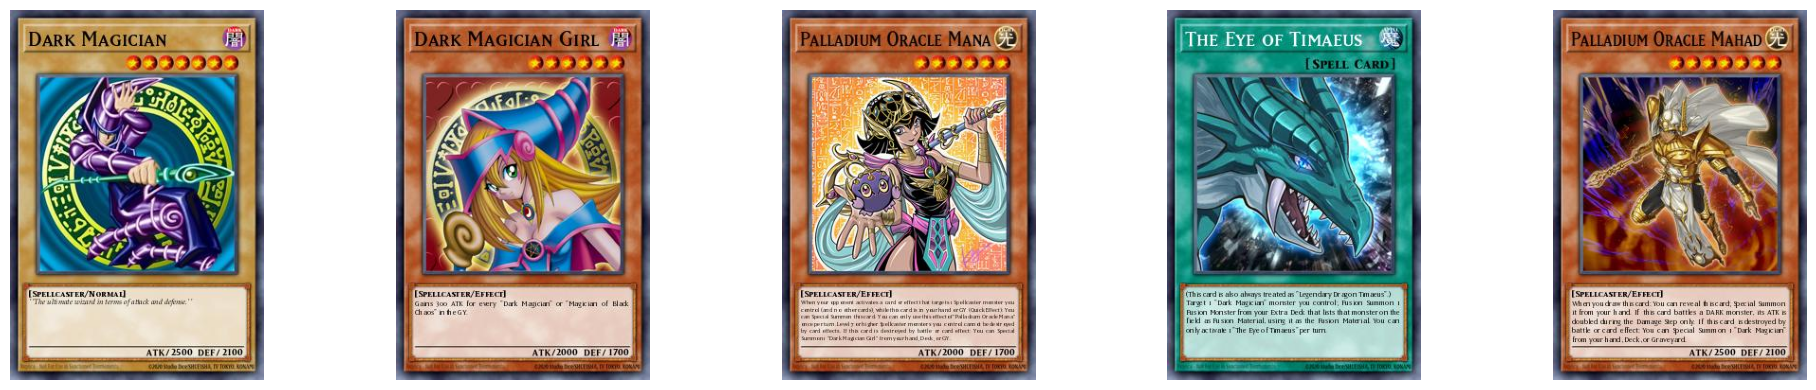

In [36]:
similar_cards = [index_to_card(idx) for idx in similar_card_ids]
draw_cards(similar_cards)